# 도서관 수입, CSV 수입

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 문제 정의

<hr style="background-color: red; height: 2px">
<Description of fnlwgt (final weight)>
 The weights on the CPS files are controlled to independent estimates of the
 civilian noninstitutional population of the US.  These are prepared monthly
 for us by Population Division here at the Census Bureau.  We use 3 sets of
 controls.
 These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through
them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating
"weighted tallies" of any specified socio-economic characteristics of the
population.

People with similar demographic characteristics should have
similar weights.  There is one important caveat to remember
about this statement.  That is that since the CPS sample is
actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within
state.

=================================================================================
컬럼 설명
<Attribute information>

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

<hr style="background-color: red; height: 2px">

In [3]:
train[['income', 'fnlwgt']].corr()

,income,fnlwgt
income,1.000000,-0.002994
fnlwgt,-0.002994,1.000000


<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

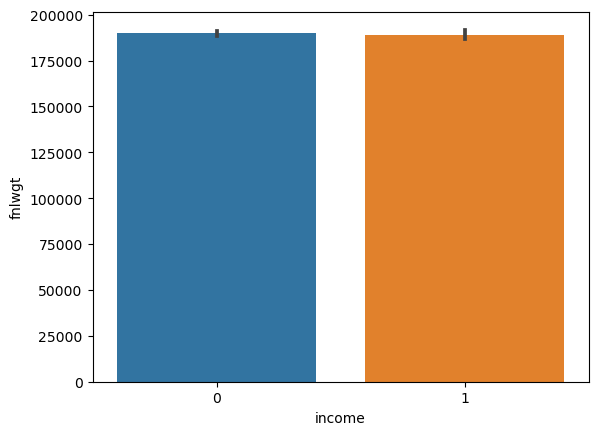

In [4]:
seaborn.barplot(x=train['income'], y=train['fnlwgt'])

In [5]:
# 나는 e1 시러용
pd.set_option('display.float_format', '{:.0f}'.format)

# 플로팅포인트 포맷 리셋용
# pd.reset_option('display.float_format')

In [6]:
train[['fnlwgt', 'race']].groupby(by='race').describe()

fnlwgt                                                 
                     count   mean    std   min    25%    50%    75%     max
race                                                                       
 Amer-Indian-Eskimo    290 120690 100468 13769  33487 100907 177636  814850
 Asian-Pac-Islander    919 162095  87250 14878  91670 143582 199802  506329
 Black                2776 229903 124508 21189 149908 206482 281714 1268339
 Other                 239 196403  93886 24562 133148 181337 238239  655066
 White               25081 187037 102834 18827 116531 177181 234192 1490400

In [7]:
train[['fnlwgt', 'native-country']].groupby(by='native-country').describe()

fnlwgt                                            \
                             count   mean    std    min    25%    50%    75%   
native-country                                                                 
 ?                             495 193049  91679  25806 133923 179048 227332   
 Cambodia                       19 212084  92452  63685 125790 228608 276874   
 Canada                        111 181747  97964  28221 102434 187355 221166   
 China                          68 182983  96225  25806 100079 161942 257485   
 Columbia                       53 205137  81085  89419 161857 195023 242987   
 Cuba                           94 239496  66723  48853 213592 236758 276182   
 Dominican-Republic             61 192701  63859  44159 145041 188507 230315   
 Ecuador                        21 160031  48066  61298 132327 153805 173534   
 El-Salvador                    96 259622 150825  39581 176227 226607 324106   
 England                        75 190709 102432  19302 109992 181132 246786   
 France                         20 194623  96960  59829 129296 177165 197630   
 Germany                       124 206154  99459  19302 134947 192108 265123   
 Greece                         25 149437  47668  62539 110015 156877 184762   
 Guatemala                      51 266011 132210  94826 175942 216937 350624   
 Haiti                          51 214193  67638  82285 169324 216116 256241   
 Holand-Netherlands              1  27882    NaN  27882  27882  27882  27882   
 Honduras                       11 275396  75827 136982 243608 261943 302675   
 Hong                           19 217175  89468 109996 150358 166386 302968   
 Hungary                        12 210656 103039 114263 137966 173752 255448   
 India                          90 164487  87865  23510 117355 144468 176913   
 Iran                           38 188036  82680  35864 140748 181522 213765   
 Ireland                        23 143525  63258  63437 112306 131608 159442   
 Italy                          60 185759  96219  37913 123141 170750 215985   
 Jamaica                        68 216623  68727  34532 174346 214784 256462   
 Japan                          54 201441 124194  29807  87960 162618 302509   
 Laos                           13 230065  99832  90688 138537 269042 303296   
 Mexico                        579 278454 108054  56121 210970 252327 346734   
 Nicaragua                      28 280829 129578 111520 196492 259294 297229   
 Outlying-US(Guam-USVI-etc)     15 209699  82132  90907 162537 218136 255116   
 Peru                           25 262419 129364 130513 171231 240612 280422   
 Philippines                   178 174074  95894  14878  87182 161513 230959   
 Poland                         53 181947  59529  98611 141807 172571 214242   
 Portugal                       43 153838 102996  60668  83179 111746 180996   
 Puerto-Rico                   117 204765  77353  26668 160837 195813 234994   
 Scotland                        9 157634  93635  71046 105788 132304 182217   
 South                          74 170535  85995  20469 122955 152911 211943   
 Taiwan                         39 177507  75441  27494 127065 166386 202062   
 Thailand                       15 173239  58414  94214 128290 171968 190798   
 Trinadad&Tobago                13 223127 143818 122975 137421 170324 237811   
 United-States               26301 187042 105415  13769 115420 176458 234542   
 Vietnam                        50 177902  73878  52028 134762 156309 235306   
 Yugoslavia                     13 241003 133119  81280 160631 179479 324629   

                                     
                                max  
native-country                       
 ?                           609789  
 Cambodia                    355856  
 Canada                      505365  
 China                       399246  
 Columbia                    597843  
 Cuba                        505119  
 Dominican-Republic          331875  
 Ecuador                     264351  
 El-Salva

<hr style="background-color: red; height: 2px">

> 즉, fnlwgt도출을 위해 
    >> 1. 16살 초과인 인구 제어 <span style="text-decoration: underline; color:red">이미 처리 되잇음</span>
    >> 2. 히스패닉인구의 나이 및 성별 별로 나뉜 제어 데이터 <span style="text-decoration: underline; color:red">(**주의**)라티노가 아님, 히스패닉임</span>
    >> 3. 단순히 인구, 성별, 나이로 나뉜 제어 데이터

> 를 사용했구만?

> My insight1 : group by와 bool indexing, binning, 컬럼 연산을 통한 2번 컬럼 추가가 필요한 듯 함

> My insight2 : 마지막으로 fnlwgt는 커스텀 수식으로 만들어진 비빔밥이므로 2번 컬럼 생성 후, correlation 비교 해서 의미 해석 후 버릴지 keep 할지 결정

> 18 submission later ..... : fnlwgt는 구간별로 비닝해야하는 것 같다 ...

> 느낀점 : 이게 SQL이여 ML이여 허허허흫

<hr style="background-color: red; height: 2px">

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       19537 non-null  object
 3   fnlwgt          19537 non-null  int64 
 4   education       19537 non-null  object
 5   education-num   19537 non-null  int64 
 6   marital-status  19537 non-null  object
 7   occupation      19537 non-null  object
 8   relationship    19537 non-null  object
 9   race            19537 non-null  object
 10  sex             19537 non-null  object
 11  capital-gain    19537 non-null  int64 
 12  capital-loss    19537 non-null  int64 
 13  hours-per-week  19537 non-null  int64 
 14  native-country  19537 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.2+ MB


<hr style="background-color: red; height: 2px">

> TARGET : INCOME COLUMN (1, 0)

<hr style="background-color: red; height: 2px">

# 전처리
    - NaN은 없는데
    - 스페이스, 물음표 있음
    - 테스트 조회용 데이터프레임 보존

In [10]:
#### 인덱스 컬럼 제거
train.drop('no', axis=1, inplace=True)

In [11]:
#### 인덱스 컬럼 제거
test.drop('no', axis=1, inplace=True)

In [12]:
#### X y 분할
X_train = train.drop('income', axis=1)
y_train = train['income']

In [13]:
X_test = test

In [14]:
X_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29305,29305,29305,29305,29305,29305
mean,39,189736,10,1085,87,40
std,14,105635,3,7496,401,12
min,17,13769,1,0,0,1
25%,28,117606,9,0,0,40
50%,37,177955,10,0,0,40
75%,48,237713,12,0,0,45
max,90,1490400,16,99999,4356,99


In [15]:
#### train은 income과의 correlation 비교용으로 사용할거임 > 실험 후 X_train과 X_test에 적용
train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1,-0,0,0,0,0,0
fnlwgt,-0,1,-0,-0,-0,-0,-0
education-num,0,-0,1,0,0,0,0
capital-gain,0,-0,0,1,-0,0,0
capital-loss,0,-0,0,-0,1,0,0
hours-per-week,0,-0,0,0,0,1,0
income,0,-0,0,0,0,0,1


<hr style="background-color: red; height: 2px">   
   
   - TODO(includes ' ?') : workclass, country, occupation 
   - includes \'&nbsp\' placed at heads : ALL THE COLUMNS

<hr style="background-color: red; height: 2px">

In [16]:
#### 컬럼 dtype 확인
print(np.dtype(train['native-country']))

object


 <hr style="background-color: red; height: 2px">
 
    - 스페이스 제거
 
 <hr style="background-color: red; height: 2px">

In [17]:
X_train.columns
X_train.shape[0]
for i in range(len(X_train.columns)):
    if np.dtype(X_train[X_train.columns[i]]) == 'object':
        X_train[X_train.columns[i]] = X_train[X_train.columns[i]].str.strip()

In [18]:
for i in range(len(X_test.columns)):
    if np.dtype(X_test[X_test.columns[i]]) == 'object':
        X_test[X_test.columns[i]] = X_test[X_test.columns[i]].str.strip()

<hr style="background-color: red; height: 2px">

> 편의를 위해 train도 스페이스 제거

<hr style="background-color: red; height: 2px">

In [19]:
for i in range(len(test.columns)):
    if np.dtype(test[test.columns[i]]) == 'object':
        test[test.columns[i]] = test[test.columns[i]].str.strip()

In [20]:
for i in range(len(train.columns)):
    if np.dtype(train[train.columns[i]]) == 'object':
        train[train.columns[i]] = train[train.columns[i]].str.strip()

# EDA - E : 엥? D: ㄷㄷ A: 아...
    - EDA - 전처리 반복 진행 함

## 'relationship' 컬럼

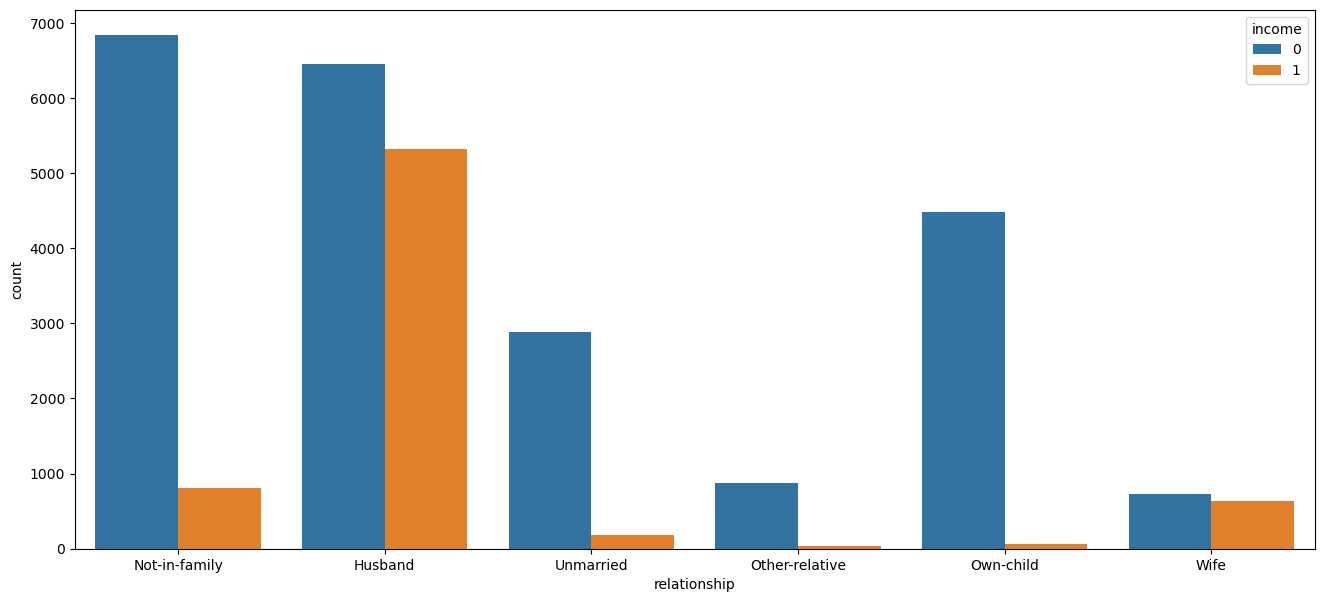

In [21]:
# 컬럼들 슼핸중
X_train['relationship'].unique()
plt.figure(figsize=(16,7))
seaborn.countplot(data=train, x='relationship', hue='income')
plt.show()
## 가족이 있다 vs 혼자 로 나눌거임

## 'education' 컬럼

In [22]:
# education 컬럼 지워도 댈지 쓰윽봐보오자
X_train[['education', 'education-num']].groupby(by='education').value_counts()

education     education-num
10th          6                 816
11th          7                1057
12th          8                 415
1st-4th       2                 148
5th-6th       3                 334
7th-8th       4                 574
9th           5                 430
Assoc-acdm    12                980
Assoc-voc     11               1230
Bachelors     13               4848
Doctorate     16                347
HS-grad       9                9435
Masters       14               1587
Preschool     1                  46
Prof-school   15                500
Some-college  10               6558
dtype: int64

<hr style="background-color: red; height: 2px">
    
    - CONCLUSION : DROP 'education' ; DUE TO THE DIRECT CORRELATION TO THE 'education-num' COLUMN
    - 저학력은 숫자 낮고 고학력은 높당꼐
    - 순서 : PRE-SCHOOL > 1ST~4TH ... ... ... MASTER > DOCTORATE
    - 고로 EDUCATION-NUM과 중복 컬럼이라고 간주
    - 지울거임 ㅇㅇ
    
<hr style="background-color: red; height: 2px">

In [23]:
X_train.drop('education', axis=1, inplace=True)

In [24]:
X_test.drop('education', axis=1, inplace=True)

In [25]:
X_train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1,-0,0,0,0,0
fnlwgt,-0,1,-0,-0,-0,-0
education-num,0,-0,1,0,0,0
capital-gain,0,-0,0,1,-0,0
capital-loss,0,-0,0,-0,1,0
hours-per-week,0,-0,0,0,0,1


<hr style="background-color: red; height: 2px">
<hr style="background-color: red; height: 2px">
<hr style="background-color: red; height: 2px">

      - THOSE THAT HAVE '?' IN THEM
      
      - (결국 Feature engineering으로 컬럼들 단순화 진행했으나 일기 쓴거 일단 남겨뒀음)
      
      - ? 값 처리 위해 describe 조회
<hr style="background-color: red; height: 2px">
<hr style="background-color: red; height: 2px">
<hr style="background-color: red; height: 2px">

<hr style="background-color:green; height:2px">
<hr style="background-color:green; height:2px">
<hr style="background-color:green; height:2px">

## 'workclass' - 'race' - 'native-country' 의 '?'에 대한 값 분석

In [26]:
X_train['workclass'][X_train['workclass']=='?']

19       ?
20       ?
24       ?
37       ?
47       ?
        ..
29244    ?
29247    ?
29280    ?
29286    ?
29304    ?
Name: workclass, Length: 1663, dtype: object

In [27]:
# ?가 있는 3개 컬럼 중 workclass
X_train['workclass'].describe()

count       29305
unique          9
top       Private
freq        20410
Name: workclass, dtype: object

In [28]:
# ?가 있는 3개 컬럼 중 occupation
X_train['occupation'][X_train['workclass']=='?']

19       ?
20       ?
24       ?
37       ?
47       ?
        ..
29244    ?
29247    ?
29280    ?
29286    ?
29304    ?
Name: occupation, Length: 1663, dtype: object

In [29]:
# # ?가 있는 3개 컬럼 중 native-country
X_train['native-country'][X_train['native-country']=='?']

25       ?
296      ?
305      ?
421      ?
432      ?
        ..
28885    ?
28953    ?
29067    ?
29230    ?
29245    ?
Name: native-country, Length: 495, dtype: object

In [30]:
train[['race', 'native-country']][(train['race']=='White') & (train['native-country']!='United-States') &(train['native-country']!='?')].groupby(by='native-country').value_counts().head(50)

native-country              race 
Cambodia                    White      2
Canada                      White    109
China                       White      2
Columbia                    White     48
Cuba                        White     89
Dominican-Republic          White     37
Ecuador                     White     14
El-Salvador                 White     91
England                     White     71
France                      White     19
Germany                     White    114
Greece                      White     25
Guatemala                   White     44
Haiti                       White      1
Holand-Netherlands          White      1
Honduras                    White     10
Hong                        White      2
Hungary                     White     12
India                       White      6
Iran                        White     29
Ireland                     White     23
Italy                       White     60
Jamaica                     White      1
Japan                  

   <hr style="background-color:red; height:2px">
   
   - CONCLUSION : CAN'T BE JUDICIAL ON PEOPLE'S SKIN COLOR LOLOLOLOL
    
   - <span style="text-decoration: underline;color:red">Income과 합쳐서 보려면 train으로 열람 함</span>
    
   - 피부 하얗다구 미쿠긴 아니랑꼐. VERY POLITICALLY CORRECT
   - <span style="text-decoration: underline;color:green;">Unspecified 로 처리 후 나중에 revisit 하자
    
<hr style="background-color:red; height:2px">

In [31]:
X_train['occupation'][X_train['occupation']=='?']

19       ?
20       ?
24       ?
37       ?
47       ?
        ..
29244    ?
29247    ?
29280    ?
29286    ?
29304    ?
Name: occupation, Length: 1668, dtype: object

In [32]:
train[['occupation', 'race', 'native-country', 'income']][(train['occupation']!='?')&(train['native-country']!='United-States')].groupby(by=['occupation','native-country']).value_counts().head(50)

occupation    native-country              race                income
Adm-clerical  ?                           White               0         25
                                          Black               0         10
                                          Asian-Pac-Islander  0          5
                                          White               1          4
                                          Other               0          3
                                          Asian-Pac-Islander  1          2
              Canada                      White               0          6
                                                              1          2
              China                       Asian-Pac-Islander  0          2
              Columbia                    White               0          6
              Cuba                        White               0         12
                                                              1          3
              Dominican-Republi

<hr style="background-color:red; height:2px">
    <ul>
    <li>
CONCLUSION : SAME AS ABOVE, YOU CAN'T BE TOO JUDGEMENTAL
    </li><li>
청소부라고 다 히스패닉이 아니다아아아아아아
    </li><li>
<span style="text-decoration: underline;color:green;">
결론 : 일단 세 컬럼 모두 ?는 Unspecified 처리
    </span>
    </li>
    </ul>
<hr style="background-color:red; height:2px">

## '?' 값 처리

In [33]:
#train['occupation'].value_counts()
#train['workclass'].value_counts()
train['native-country'].value_counts()
#일단 최빈값으로 해보자 : 
# occupation ? : Prof-specialty
# workclass ? : Private
# native-country ? : United-States

United-States                 26301
Mexico                          579
?                               495
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy                            60
Japan                            54
Poland                           53
Columbia                         53
Guatemala                        51
Haiti                            51
Vietnam                          50
Portugal                         43
Taiwan                           39
Iran                             38
Nicaragua                        28
Peru                             25
Greece                      

In [34]:
# MFV로 처리할 경우 어떤걸로 할지 조회
train[['occupation', 'income']][train['occupation']=='?'].value_counts()

occupation  income
?           0         1493
            1          175
dtype: int64

In [35]:
train[['occupation', 'income']].groupby(by='income').value_counts()
# 이걸로 '?' 비닝 하자

income  occupation       
0       Adm-clerical         2982
        Other-service        2846
        Craft-repair         2812
        Sales                2385
        Prof-specialty       2052
        Exec-managerial      1870
        Machine-op-inspct    1572
        ?                    1493
        Handlers-cleaners    1166
        Transport-moving     1111
        Farming-fishing       793
        Tech-support          619
        Protective-serv       409
        Priv-house-serv       143
        Armed-Forces            7
1       Exec-managerial      1739
        Prof-specialty       1672
        Sales                 907
        Craft-repair          820
        Adm-clerical          458
        Transport-moving      282
        Tech-support          246
        Machine-op-inspct     239
        Protective-serv       194
        ?                     175
        Other-service         129
        Farming-fishing        95
        Handlers-cleaners      83
        Armed-Forces  

In [36]:
train[['occupation']].value_counts()

occupation       
Prof-specialty       3724
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
?                    1668
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
dtype: int64

In [37]:
# 방법 1: ?를 그냥 이름만 붙여주기  # filter(lambda x: x=='?', X_train['occupation'])
# 방법 2: ?를 MFV로 
# 방법 3: occupation에서 1일때와 0일때의 각각 최빈값을 집어넣음
for i in range(len(X_train['occupation'])):
    if X_train['occupation'][i] == '?': # and train['income'][i] == 1:
        X_train['occupation'][i] = 'Prof-specialty'
   # else:
    #    X_train['occupation'][i] = 'Adm-clerical'

In [38]:
train[['workclass', 'income']].groupby(by='income').value_counts()

income  workclass       
0       Private             15932
        Self-emp-not-inc     1662
        ?                    1488
        Local-gov            1309
        State-gov             886
        Federal-gov           527
        Self-emp-inc          440
        Without-pay            11
        Never-worked            5
1       Private              4478
        Self-emp-not-inc      643
        Local-gov             559
        Self-emp-inc          547
        Federal-gov           327
        State-gov             315
        ?                     175
        Without-pay             1
dtype: int64

In [39]:
for i in range(len(X_train['workclass'])):
    if X_train['workclass'][i] == '?':
        X_train['workclass'][i] = 'Private'
# 0 과 1의 최빈값이 Private으로 같으므로 둘 다 Private으로 통일 함

In [40]:
train[['native-country', 'income']].groupby(by='income').value_counts()

income  native-country            
0       United-States                 19834
        Mexico                          548
        ?                               378
        Philippines                     128
        Puerto-Rico                     105
                                      ...  
1       Honduras                          1
        Laos                              1
        Scotland                          1
        Vietnam                           1
        Outlying-US(Guam-USVI-etc)        1
Length: 82, dtype: int64

In [41]:
for i in range(len(X_train['native-country'])):
    if X_train['native-country'][i] == '?':
        X_train['native-country'][i] = 'United-States'
# 역시 미국으로 통일해도 될듯

In [42]:
test[['occupation']].value_counts()
# test 테이블 ? 값에 넣을 최빈값 탐색

occupation       
Craft-repair         2480
Exec-managerial      2477
Prof-specialty       2448
Sales                2212
Adm-clerical         2171
Other-service        1948
Machine-op-inspct    1211
?                    1141
Transport-moving      962
Handlers-cleaners     823
Farming-fishing       602
Tech-support          581
Protective-serv       380
Priv-house-serv        96
Armed-Forces            5
dtype: int64

In [43]:
for i in range(len(X_test['native-country'])):
    if X_test['native-country'][i] == '?':
        X_test['native-country'][i] = 'United-States'
for i in range(len(X_test['workclass'])):
    if X_test['workclass'][i] == '?':
        X_test['workclass'][i] = 'Private'
for i in range(len(X_test['occupation'])):
    if X_test['occupation'][i] == '?':# and X_test['income'][i] == 1:
        X_test['occupation'][i] = 'Craft-repair'
   # else:
    #    X_test['occupation'][i] = 'Adm-clerical'

<hr style="background-color:red; height:2px">

> X - terminated lol

> ? 바꾸기 끗

<hr style="background-color:red; height:2px">

## 'occupation'과 'workclass'의 관계 분석

In [44]:
##### occupation & workclass 비교
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education-num   29305 non-null  int64 
 4   marital-status  29305 non-null  object
 5   occupation      29305 non-null  object
 6   relationship    29305 non-null  object
 7   race            29305 non-null  object
 8   sex             29305 non-null  object
 9   capital-gain    29305 non-null  int64 
 10  capital-loss    29305 non-null  int64 
 11  hours-per-week  29305 non-null  int64 
 12  native-country  29305 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.9+ MB


In [45]:
X_train['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

<hr style="background-color:red; height:2px">

> MOVING ON TO THE WORKCLASS COLUMN.

> LET'S TALK WEIGHTS ON EACH CATEGORIES

> CHECK CORRELATION FOR workclass AND income

<hr style="background-color:red; height:2px">

In [46]:
class_and_income = train[['workclass', 'income']].groupby(by='workclass').value_counts()

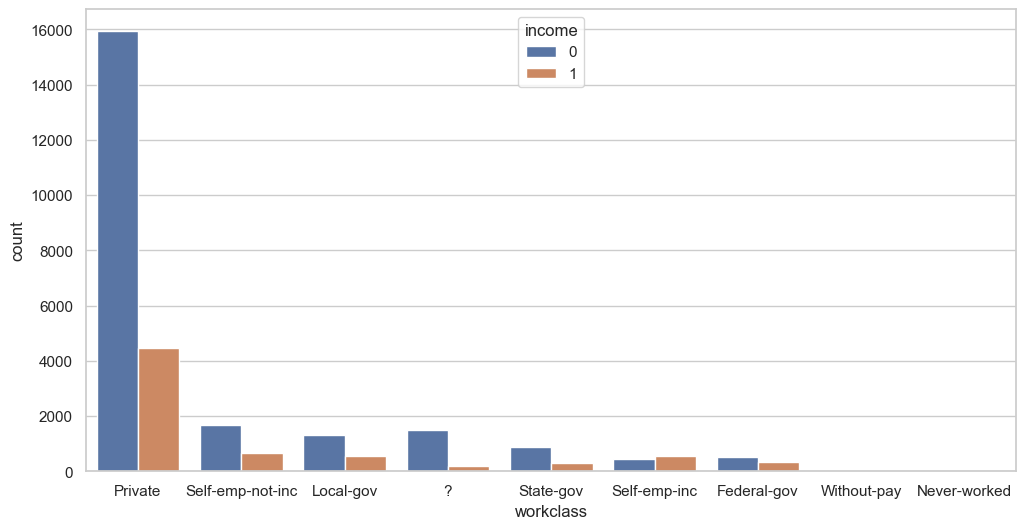

In [47]:
seaborn.set(style="whitegrid")
plt.figure(figsize=(12, 6))
seaborn.countplot(data=train, x='workclass', hue='income' ) 
plt.show()

<hr style="background-color:red; height:2px">
    
    - workclass self-emp-inc ratio >> (income) 1:0 = 547:440
        
    - fed gov >> 1:0 = 327:527
    
<hr style="background-color:red; height:2px">

In [48]:
train[['workclass','income']][train['workclass']=='Self-emp-inc'].value_counts()

workclass     income
Self-emp-inc  1         547
              0         440
dtype: int64

In [49]:
train[['workclass','income']][train['workclass']=='Without-pay'].value_counts()

workclass    income
Without-pay  0         11
             1          1
dtype: int64

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education-num   29305 non-null  int64 
 4   marital-status  29305 non-null  object
 5   occupation      29305 non-null  object
 6   relationship    29305 non-null  object
 7   race            29305 non-null  object
 8   sex             29305 non-null  object
 9   capital-gain    29305 non-null  int64 
 10  capital-loss    29305 non-null  int64 
 11  hours-per-week  29305 non-null  int64 
 12  native-country  29305 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.9+ MB


## 'marital-status' 컬럼

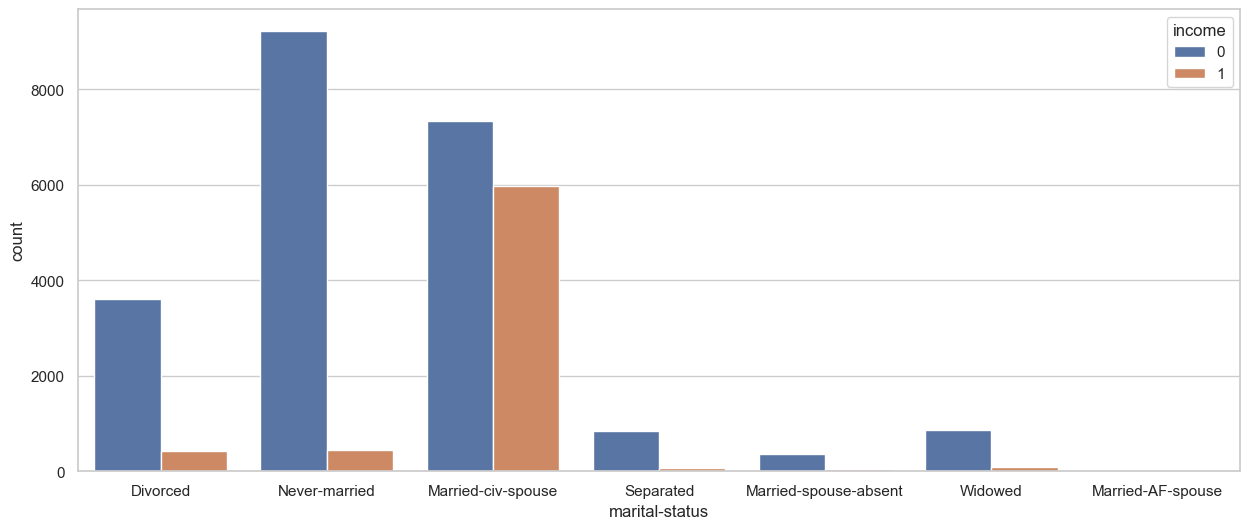

In [51]:
### 혼인상태와 관계 알아보기
## 배우자 있고 없고로 나누는 것이 효과적일 듯
plt.figure(figsize=(15,6))
seaborn.countplot(data=train, x='marital-status', hue='income')
plt.show()

In [52]:
train['marital-status'][train['marital-status']=='Married-AF-spouse'].value_counts()

Married-AF-spouse    21
Name: marital-status, dtype: int64

<hr style="background-color:green; height:2px">
<hr style="background-color:green; height:2px">
<hr style="background-color:green; height:2px">

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education-num   29305 non-null  int64 
 4   marital-status  29305 non-null  object
 5   occupation      29305 non-null  object
 6   relationship    29305 non-null  object
 7   race            29305 non-null  object
 8   sex             29305 non-null  object
 9   capital-gain    29305 non-null  int64 
 10  capital-loss    29305 non-null  int64 
 11  hours-per-week  29305 non-null  int64 
 12  native-country  29305 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.9+ MB


       - 오브젝트 컬럼들 전처리 : workclass, marital-status, occupation, relationship, race, sex, native-country

- MARITAL-STATUS : PRESENCE OF SPOUSES x o
- 배우자 유무로 단순화

In [54]:
train['race'][train['income']==1].value_counts()

White                 6417
Black                  329
Asian-Pac-Islander     235
Amer-Indian-Eskimo      36
Other                   28
Name: race, dtype: int64

## 'occupation' 컬럼

In [55]:
# dtype object 인 컬럼들 탐색중 (수정 거침)
train['occupation'].value_counts()

Prof-specialty       3724
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
?                    1668
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64

소득 분포 비율 분포 비율

In [56]:
##### (occupation 컬럼 단순화 해도 될지 체크중)

In [57]:
hello = (train['occupation'][train['income']==1].value_counts()) / (train['occupation'].value_counts())

In [58]:
(hello*100).sort_values(ascending=False)

Exec-managerial     48
Prof-specialty      45
Protective-serv     32
Armed-Forces        30
Tech-support        28
Sales               28
Craft-repair        23
Transport-moving    20
Adm-clerical        13
Machine-op-inspct   13
Farming-fishing     11
?                   10
Handlers-cleaners    7
Other-service        4
Priv-house-serv      2
Name: occupation, dtype: float64

## 'workclass' 컬럼

In [59]:
# workclass 무급인 사람중 소득 5만인 사람 체크 (feature 단순화 해도 될지 체크중)
train[['workclass', 'income']][(train['workclass']=='Without-pay') & (train['income']==1)]

,workclass,income
27916,Without-pay,1


## 'fnlwgt' 컬럼

<hr style="background-color:pink;height:4px">
<hr style="background-color:pink;height:4px">

- 아래처럼 fnlwgt를 헤집다가 description을 잘 읽자는 결론에 도달함 ... ... ...

<hr style="background-color:pink;height:4px">
<hr style="background-color:pink;height:4px">

In [60]:
train['fnlwgt'].describe()

count     29305
mean     189736
std      105635
min       13769
25%      117606
50%      177955
75%      237713
max     1490400
Name: fnlwgt, dtype: float64

In [61]:
scaler = StandardScaler()

fnlwgt = scaler.fit_transform(train[['fnlwgt']])

In [62]:
print(f'mean : {fnlwgt.mean().round(4)}\n std:{fnlwgt.std().round(4)}\n max:{fnlwgt.max().round(4)}\n min:{fnlwgt.min().round(4)}\n count:{fnlwgt.shape}')

mean : -0.0
 std:1.0
 max:12.3131
 min:-1.6658
 count:(29305, 1)


In [63]:
##### native country에서 이상한 나라 발견함 
display(train['race'][train['native-country']=='South'].value_counts())
## 아시아퍼시픽에서 south 붙은 나라는 한국뿐이므로 south korea일수도 + south africa, 기타 국가인듯 함
## a-p-i 인종중 국가가 South이면 Korea로 매핑?
display(train['race'][train['native-country']=='Hong'].value_counts())
## 인종으로 보아 홍콩인듯 함

########### 결국 미국 - 히스패닉 - 기타 로 단순화 할것이므로 일단 보류 함 (위 모두 히스패닉, 미국에 해당하지 않으므로)

#### 결론 앨리스는 한국사람이엇음 ####

Asian-Pac-Islander    72
Other                  1
Black                  1
Name: race, dtype: int64

Asian-Pac-Islander    16
White                  2
Amer-Indian-Eskimo     1
Name: race, dtype: int64

# 중간 결론

<hr style="background-color:salmon; height:2px;">
<hr style="background-color:orange; height:2px">
<hr style="background-color:lightyellow; height:2px;">
<hr style="background-color:lightgreen; height:2px;">
<hr style="background-color:skyblue; height:2px;">
<hr style="background-color:pink; height:2px;">

    - 방법 000001 dtype이 object인 컬럼들 단순화 : 
    1. native-country : states / hispanic / overseas
    2. marital-status : have-spouse / no-spouse
    3. relationship : supporting / non-supporting
    4. workclass : civ-servant / employee / entrepren / misc (무급 연봉5만 1명 주의)
    5. occupation : 아래 occupation 컬럼 관련 전처리 부분 참조
    6. race : 1, 0 (white / misc)
    7. sex : 1, 0
    +
    8. 서두에서 언급한 fnlwgt BINNING (히스패닉 비닝은 1번에서 진행 함)

- occupation 비닝
    - priv-house-serv
    - other-service
    - handlers-cleaners
    - 까지 카테고리1
    <hr>

    - Tech-support
    - Sales                
    - Craft-repair        
    - Transport-moving   
    - Adm-clerical        
    - Machine-op-inspct    
    - Farming-fishing      
    - ?                 
    까지 카테고리2
    <hr>
    - Exec-managerial     
    - Prof-specialty    
    - Protective-serv      
    - Armed-Forces        
    까지 카테고리3

<hr style="background-color:salmon; height:2px;">
<hr style="background-color:orange; height:2px">
<hr style="background-color:lightyellow; height:2px;">
<hr style="background-color:lightgreen; height:2px;">
<hr style="background-color:skyblue; height:2px;">
<hr style="background-color:pink; height:2px;">

# 피처 엔지니어링
    - 라고 쓰고 EDA와의 절충지대라고 읽을란다

<hr style="background-color:salmon; height:2px;">
<hr style="background-color:orange; height:2px">
<hr style="background-color:lightyellow; height:2px;">
<hr style="background-color:lightgreen; height:2px;">
<hr style="background-color:skyblue; height:2px;">
<hr style="background-color:pink; height:2px;">

|😁😁😁😁😁😁😁😁😁😁😁😁😁|
|-------------------------------------------------------------------------|
|피쳐 엔지니어링 시작|

<hr style="background-color:salmon; height:2px;">
<hr style="background-color:orange; height:2px">
<hr style="background-color:lightyellow; height:2px;">
<hr style="background-color:lightgreen; height:2px;">
<hr style="background-color:skyblue; height:2px;">
<hr style="background-color:pink; height:2px;">

## 'native-country' Binning
    - by descretinizing and mapping
    - Unsp_country (원래 '?' 값) 잊지 말 것

In [64]:
#### 국가가 ? 인 사람들을 히스패닉으로 일반화 할 수 있을지 먼저 검증
train[['race', 'fnlwgt']][train['native-country']=='?'].groupby(by='race').describe().transpose()
## 다른 인종과 비교했을 때 수치 연관이 낮은 듯 함
## 응 안되
## 패스(Overseas로 처리 할거임)

race          Asian-Pac-Islander  Black  Other  White
fnlwgt count                  85     81     12    317
       mean               186244 212407 173103 190682
       std                 95848 107797  75195  86195
       min                 25806  39223  87943  31411
       25%                130620 152734 113243 130078
       50%                163392 201624 155032 179048
       75%                227332 233555 215568 225623
       max                506329 591711 309620 609789

- 히스패닉 해당 국가들 :
    - Mexico
    - Puerto Rico
    - Dominican Republic
    - Cuba
    - Guatemala
    - El Salvador
    - Honduras
    - Nicaragua
    - Trinadad & Tobago
    - Colombia
    - Ecuador
    - Peru

In [65]:
# Unsp_country로 만든 ? 값들 챙기기 # ****최빈값 일반화 했으므로 무효임****
# map 만들기
# X_train['native-country'][X_train['native-country']=='Unsp_country']
display(X_train['native-country'].unique())

country_mapper_swapper = {
    'United-States':'United-States', 'Haiti': 'Overseas', 'Mexico': 'Hispanic',
    'Puerto-Rico': 'Hispanic', 'Philippines': 'Overseas', #'Unsp_country':'Overseas',
    'Germany': 'Overseas', 'Peru': 'Hispanic', 'Ecuador': 'Hispanic',
    'Iran': 'Overseas', 'Thailand': 'Overseas', 'Dominican-Republic': 'Hispanic',
    'Poland': 'Overseas', 'Scotland': 'Overseas', 'Italy': 'Overseas',
    'Jamaica': 'Overseas', 'China': 'Overseas', 'Portugal': 'Overseas',
    'Columbia': 'Hispanic', 'Hungary': 'Overseas', 'Vietnam': 'Overseas',
    'Taiwan': 'Overseas', 'Canada': 'Overseas', 'Hong': 'Overseas',
    'Guatemala': 'Hispanic', 'El-Salvador': 'Hispanic', 'England': 'Overseas',
    'Outlying-US(Guam-USVI-etc)': 'United-States', 'India': 'Overseas', 'France': 'Overseas',
    'Cuba': 'Hispanic', 'Greece': 'Overseas', 'Trinadad&Tobago': 'Hispanic',
    'South': 'Overseas', 'Japan': 'Overseas', 'Yugoslavia': 'Overseas',
    'Nicaragua': 'Hispanic', 'Ireland': 'Overseas', 'Cambodia': 'Overseas',
    'Laos': 'Overseas', 'Honduras': 'Hispanic', 'Holand-Netherlands':'Overseas'
}

array(['United-States', 'Haiti', 'Mexico', 'Puerto-Rico', 'Philippines',
       'Germany', 'Peru', 'Ecuador', 'Iran', 'Thailand',
       'Dominican-Republic', 'Poland', 'Scotland', 'Italy', 'Jamaica',
       'China', 'Portugal', 'Columbia', 'Hungary', 'Vietnam', 'Taiwan',
       'Canada', 'Hong', 'Guatemala', 'El-Salvador', 'England',
       'Outlying-US(Guam-USVI-etc)', 'India', 'France', 'Cuba', 'Greece',
       'Trinadad&Tobago', 'South', 'Japan', 'Yugoslavia', 'Nicaragua',
       'Ireland', 'Cambodia', 'Laos', 'Honduras', 'Holand-Netherlands'],
      dtype=object)

In [66]:
############## 매핑 한다잉 ###############mapping (this is for ctrl+f)
X_train['native-country'] = X_train['native-country'].map(country_mapper_swapper)

In [67]:
X_test['native-country'] = X_test['native-country'].map(country_mapper_swapper)

In [68]:
X_train['native-country'].value_counts() ### 자알 됫구만

United-States    26811
Overseas          1345
Hispanic          1149
Name: native-country, dtype: int64

## 'marital-status' Binning
    - by discretinizing and mapping
    - Unsp_country (원래 '?' 값) 잊지 말 것

In [69]:
(train['marital-status'][train['income']==1].value_counts() / train['marital-status'].value_counts()).sort_values(ascending=False)

Married-civ-spouse      0
Married-AF-spouse       0
Divorced                0
Married-spouse-absent   0
Widowed                 0
Separated               0
Never-married           0
Name: marital-status, dtype: float64

In [70]:
##ㄱㄱㄱㄱㄱ 말이 필요읍어용 ....스압 오지니까 다시 조회 맨날 조회 24/7조회
display(X_train['marital-status'].value_counts())
# 잇없 맾잉ㄱㄱ
print('-------------------------------')
# 민간인(civ)이든 군인(af)이든 상관 읍다 civ의 고소득 비율 0.45 af의 고소득 비율 0.40 
display(train[['marital-status', 'income']][(train['marital-status']=='Married-AF-spouse')|(train['marital-status']=='Married-civ-spouse')].value_counts())
# ㅋㅋ spouse mapping 
print('-------------------------------')
# 응 위자료로 부자 되진 않죠 ?
display(train[['marital-status', 'income']][train['marital-status']=='Divorced'].value_counts())
spouse_mapping = {
    'Married-civ-spouse':'Mari-Cat1',
    'Never-married':'Mari-Cat3',
    'Divorced':'Mari-Cat2',
    'Widowed':'Mari-Cat2',
    'Separated':'Mari-Cat3',
    'Married-spouse-absent':'Mari-Cat2',
    'Married-AF-spouse':'Mari-Cat1'
}
######################### OR #########################
# spouse_mapping = {
 #   'Married-civ-spouse':0.4490,
 #   'Never-married':0.0468,
 #   'Divorced':0.1045,
 #   'Widowed':0.0839,
 #   'Separated':0.0678,
 #   'Married-spouse-absent':0.0939,
 #   'Married-AF-spouse':0.3810
# }
## 매핑 ㄱㄱ
X_train['marital-status'] = X_train['marital-status'].map(spouse_mapping)

Married-civ-spouse       13331
Never-married             9673
Divorced                  4030
Widowed                    942
Separated                  914
Married-spouse-absent      394
Married-AF-spouse           21
Name: marital-status, dtype: int64

-------------------------------


marital-status      income
Married-civ-spouse  0         7346
                    1         5985
Married-AF-spouse   0           13
                    1            8
dtype: int64

-------------------------------


marital-status  income
Divorced        0         3609
                1          421
dtype: int64

In [71]:
X_test['marital-status']=  X_test['marital-status'].map(spouse_mapping)

In [72]:
X_train['marital-status'].value_counts()

Mari-Cat1    13352
Mari-Cat3    10587
Mari-Cat2     5366
Name: marital-status, dtype: int64

## 'relationship' Binning
    - 비닝 전 최종 확인

In [73]:
train['relationship'].value_counts()

Husband           11769
Not-in-family      7637
Own-child          4554
Unmarried          3071
Wife               1370
Other-relative      904
Name: relationship, dtype: int64

In [74]:
train[['relationship', 'marital-status']].value_counts()

relationship    marital-status       
Husband         Married-civ-spouse       11763
Not-in-family   Never-married             4272
Own-child       Never-married             4059
Not-in-family   Divorced                  2225
Unmarried       Divorced                  1423
Wife            Married-civ-spouse        1356
Unmarried       Never-married              793
Other-relative  Never-married              549
Not-in-family   Widowed                    530
                Separated                  391
Unmarried       Separated                  387
                Widowed                    351
Own-child       Divorced                   274
Not-in-family   Married-spouse-absent      206
Other-relative  Married-civ-spouse         119
Unmarried       Married-spouse-absent      117
Other-relative  Divorced                   108
Own-child       Separated                   87
                Married-civ-spouse          80
Other-relative  Separated                   49
                Widowe

In [75]:
train[['relationship', 'marital-status']][train['relationship']=='Not-in-family'].value_counts()

relationship   marital-status       
Not-in-family  Never-married            4272
               Divorced                 2225
               Widowed                   530
               Separated                 391
               Married-spouse-absent     206
               Married-civ-spouse         13
dtype: int64

In [76]:
train[['relationship', 'occupation', 'sex']][(train['relationship']=='Husband') | (train['relationship']=='Wife')].value_counts()
# 부부가 백수인 사람은 없는듯

relationship  occupation         sex   
Husband       Craft-repair       Male      2181
              Exec-managerial    Male      1935
              Prof-specialty     Male      1624
              Sales              Male      1346
              Transport-moving   Male       867
              Machine-op-inspct  Male       805
              Adm-clerical       Male       565
              Farming-fishing    Male       495
              Other-service      Male       476
              ?                  Male       424
              Handlers-cleaners  Male       407
              Protective-serv    Male       341
Wife          Adm-clerical       Female     313
Husband       Tech-support       Male       298
Wife          Prof-specialty     Female     281
              Exec-managerial    Female     199
              Other-service      Female     159
              ?                  Female     116
              Sales              Female     102
              Machine-op-inspct  Female      60


In [77]:
# 피부양자여도 별의별 일 다하죠잉
train[['relationship', 'occupation', 'sex']][train['relationship']=='Own-child'].value_counts()

relationship  occupation         sex   
Own-child     Adm-clerical       Female    494
              Other-service      Female    404
              Sales              Female    387
              Other-service      Male      380
              Craft-repair       Male      331
              Handlers-cleaners  Male      329
              ?                  Male      272
              Sales              Male      253
              ?                  Female    245
              Adm-clerical       Male      211
              Machine-op-inspct  Male      171
              Prof-specialty     Female    152
                                 Male      129
              Transport-moving   Male      127
              Farming-fishing    Male      117
              Exec-managerial    Male      105
                                 Female     87
              Machine-op-inspct  Female     69
              Tech-support       Male       62
              Protective-serv    Male       53
              Tech-s

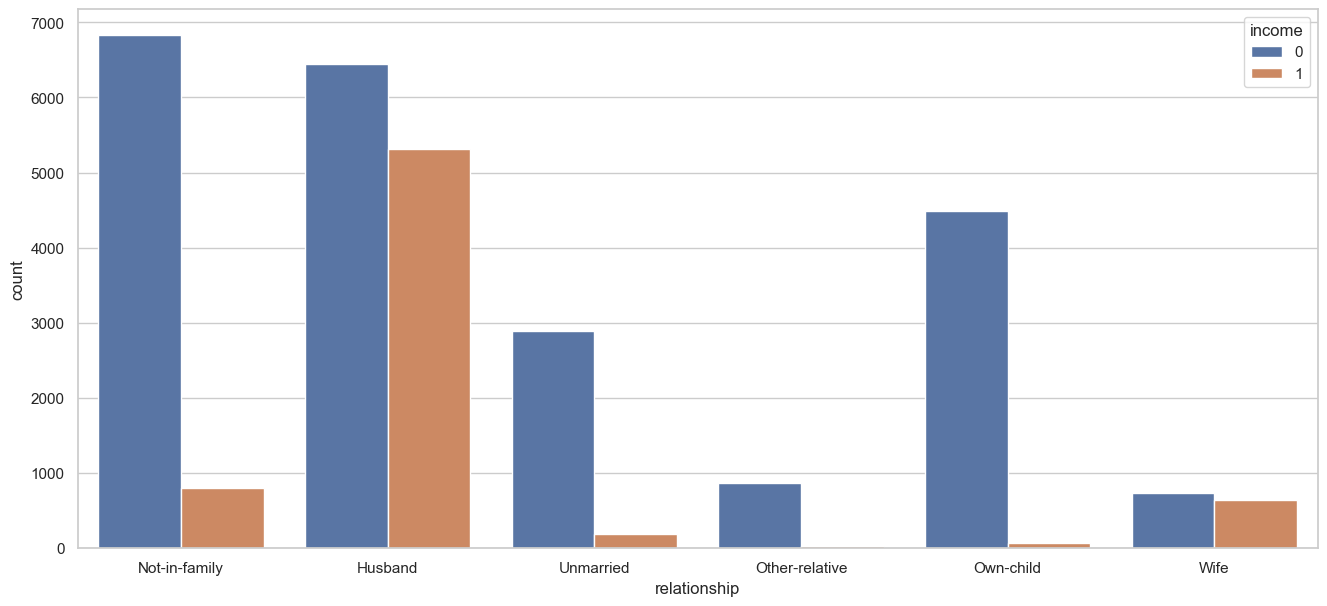

In [78]:
plt.figure(figsize=(16, 7))
seaborn.countplot(data=train, x='relationship', hue='income')
plt.show()

In [79]:
(train['relationship'][train['income']==1].value_counts() / train['relationship'].value_counts()).sort_values(ascending=False)

Wife             0
Husband          0
Not-in-family    0
Unmarried        0
Other-relative   0
Own-child        0
Name: relationship, dtype: float64

In [80]:
# this is a no-brainer //  lol spoke too soon!
# 결론 : 부양가족이 있음 / 없음으로 나눈다.
rel_mapping = {
    'Husband':'Supporting', # 본인이 남편임
    'Not-in-family':'Self-sufficient', # 적이 없음
    'Own-child':'Non-supporting', # 피부양자임
    'Unmarried':'Self-sufficient', # 미혼
    'Wife':'Supporting', # 본인이 아내임
    'Other-relative':'Non-supporting'
}
################################## OR ##################################
# rel_mapping = {
 #   'Husband':0.4520, # 본인이 남편임
 #   'Not-in-family':0.1051, # 적이 없음
 #   'Own-child':0.0143, # 피부양자임
 #   'Unmarried':0.0606, # 미혼
 #   'Wife':0.4664, # 본인이 아내임
 #   'Other-relative':0.0354
# }

# ㄱㄱㄱ
X_train['relationship'] = X_train['relationship'].map(rel_mapping)

In [81]:
X_test['relationship'] = X_test['relationship'].map(rel_mapping)

In [82]:
X_train['relationship'].value_counts()

Supporting         13139
Self-sufficient    10708
Non-supporting      5458
Name: relationship, dtype: int64

## 'occupation' Binning

In [83]:
train[['occupation','income']][(train['occupation']=='Priv-house-serv')].value_counts()

occupation       income
Priv-house-serv  0         143
                 1           3
dtype: int64

In [84]:
# eda 확실히 햇으니 바로 비닝 ㄱㄱ
display(X_train['occupation'].unique())
# 최빈값 비닝 한거 수정
occ_mapping = {
    'Machine-op-inspct':'Job-Cat2', 'Other-service':'Job-Cat3', 'Handlers-cleaners':'Job-Cat3',
    'Tech-support':'Job-Cat1', 'Transport-moving':'Job-Cat2', 'Farming-fishing':'Job-Cat3',
    'Prof-specialty':'Job-Cat1', 'Priv-house-serv':'Job-Cat3', 'Adm-clerical':'Job-Cat3',
    'Protective-serv':'Job-Cat1', 'Exec-managerial':'Job-Cat1', #'Unsp_Career':'Job-Cat3',
    'Craft-repair':'Job-Cat2', 'Sales':'Job-Cat1', 'Armed-Forces':'Job-Cat1'
}
### 방법 2 : continuous로 전환
# occ_mapping = {
 #   'Machine-op-inspct':0.1320, 'Other-service':0.0434, 'Handlers-cleaners':0.0665,
 #      'Tech-support':0.2844, 'Transport-moving':0.2024, 'Farming-fishing':0.1070,
 #      'Prof-specialty':0.4490, 'Priv-house-serv':0.0205, 'Adm-clerical':0.1331,
 #      'Protective-serv':0.3217, 'Exec-managerial':0.4819, 'Unsp_Career':0.1049,
 #      'Craft-repair':0.2258, 'Sales':0.2755, 'Armed-Forces':0.3000
# }
X_train['occupation'] = X_train['occupation'].map(occ_mapping)

array(['Machine-op-inspct', 'Other-service', 'Handlers-cleaners',
       'Tech-support', 'Transport-moving', 'Farming-fishing',
       'Prof-specialty', 'Priv-house-serv', 'Adm-clerical',
       'Protective-serv', 'Exec-managerial', 'Craft-repair', 'Sales',
       'Armed-Forces'], dtype=object)

In [85]:
X_test['occupation'] = X_test['occupation'].map(occ_mapping)

In [86]:
X_test['occupation'].value_counts()

Job-Cat1    8103
Job-Cat2    5794
Job-Cat3    5640
Name: occupation, dtype: int64

## 'workclass' Binning

In [87]:
X_train['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [88]:
(train['workclass'][train['income']==1].value_counts() / train['workclass'].value_counts()).sort_values(ascending=False)
# 이렇게 비닝 해도 될듯 (occupation 처럼)
# NaN은 Never-worked가 인컴 1에 아예 못껴서 그러타. 신경 ㄴㄴ

Self-emp-inc         1
Federal-gov          0
Local-gov            0
Self-emp-not-inc     0
State-gov            0
Private              0
?                    0
Without-pay          0
Never-worked       NaN
Name: workclass, dtype: float64

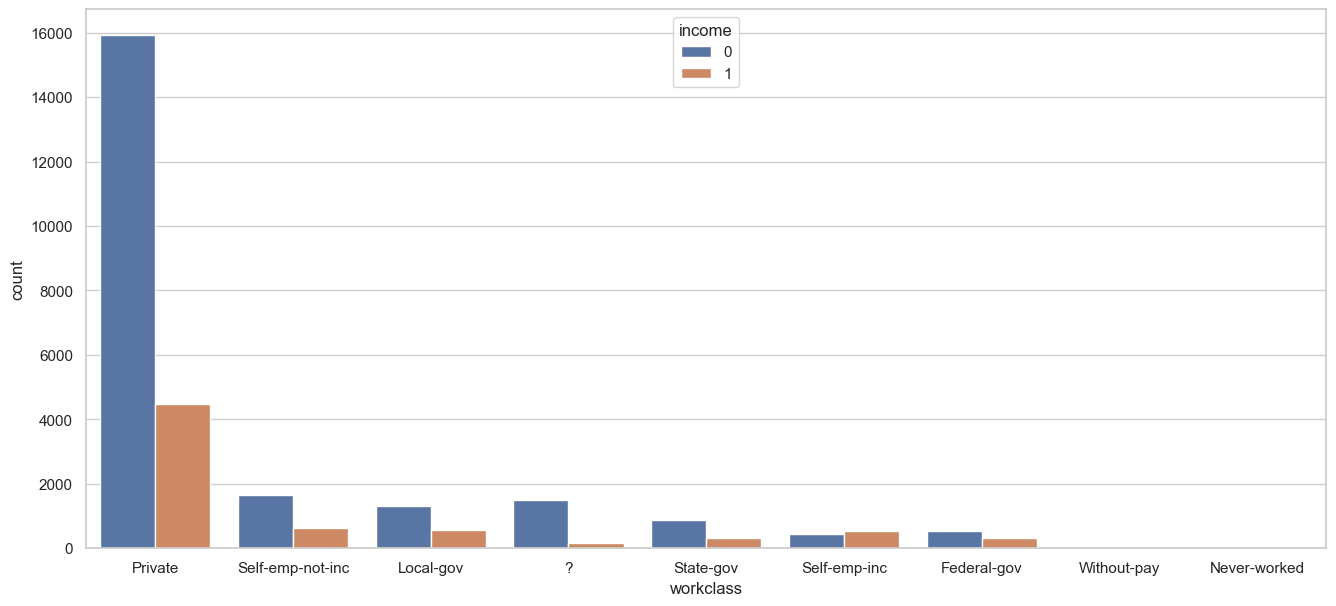

In [89]:
plt.figure(figsize=(16, 7))
seaborn.countplot(data=train, x='workclass', hue='income')
plt.show()

In [90]:
## 빠른 비닝 ㄱㄱ
## workclass 애매함... 3번째 수정 : 다시 비닝 (비율 근거)
class_mapping = {
    'Private':'#2ndCat', 'Self-emp-not-inc':'#2ndCat', 'Local-gov':'#2ndCat', 'Unsp_class':'#3rdCat',
    'State-gov':'#2ndCat', 'Self-emp-inc':'#1stCat', 'Federal-gov':'#1stCat',
    'Without-pay':'#3rdCat', 'Never-worked':'#3rdCat'
}

## 방법 2 continuous로 만들기 (전체 workclass중 income 1인 비율 : 즉 중요도 만들어주기임)
# class_mapping = {
 #   'Private':0.2194, 'Self-emp-not-inc':0.2790, 'Local-gov':0.2993, 'Unsp_class':0.1052,
 #   'State-gov':0.2623, 'Self-emp-inc':0.5542, 'Federal-gov':0.3829,
 #   'Without-pay':0.0833, 'Never-worked':0.0000
# }

## 방법 3 레이블 엔코딩 
# class_mapping = {
 #   'Private':2, 'Self-emp-not-inc':2, 'Local-gov':2, #'Unsp_class':1,
 #  'State-gov':2, 'Self-emp-inc':3, 'Federal-gov':3,
 #   'Without-pay':1, 'Never-worked':1
# }

# 일단 3분류 하고 평가 루프 돌자 ->> 스코어에 영향 큰듯 해서 위의 continuous로 함
X_train['workclass'] = X_train['workclass'].map(class_mapping)

In [91]:
X_test['workclass'] = X_test['workclass'].map(class_mapping)

In [92]:
X_train['workclass'].value_counts()

#2ndCat    27447
#1stCat     1841
#3rdCat       17
Name: workclass, dtype: int64

## 'race' Binning

In [93]:
# 여기도 애매하면 continuous 수치로 나눠보오자
(train['race'][train['income']==0].value_counts() / train['race'].value_counts()).sort_values(ascending=False)

Other                1
Black                1
Amer-Indian-Eskimo   1
Asian-Pac-Islander   1
White                1
Name: race, dtype: float64

In [94]:
train['race'].value_counts()
# 인종 일반화 하는건 위험함 (국적을 hispanic / states / misc로 나눴음...)
# hispanic이 백인일수도, 라티노일수도 있음
# 그래도 할거임
# PCPC한 카테고리명으로 바꿀거임 ㅎㅎ ㅋ ㅎㅋㅎㅎㅋㅎㅋㅎㅋㅎㅎㅎㅋㅎ
race_mapping = {# 지리네 1st class capitalist pig!!! 
    'White':'Class1', 'Black':'Class2', 'Asian-Pac-Islander':'Class1',
    'Amer-Indian-Eskimo':'Class2', 'Other':'Class2'
}

# METHOD 2 
# race_mapping = { # ex> only 25% of white ppl earns over 50k a year
 #   'White':0.2559, 'Black':0.1185, 'Asian-Pac-Islander':0.2557,
 #   'Amer-Indian-Eskimo':0.1241, 'Other':0.1171
# }

X_train['race'] = X_train['race'].map(race_mapping)
X_test['race'] = X_test['race'].map(race_mapping)

In [95]:
X_test['race'].unique()

array(['Class1', 'Class2'], dtype=object)

## 'fnlwgt' Binning

In [96]:
X_train['age'][X_train['age']<18] # 16 이하는업다...하긴 

17       17
332      17
347      17
378      17
540      17
         ..
28773    17
28835    17
28878    17
29054    17
29281    17
Name: age, Length: 358, dtype: int64

In [97]:
train['std-wgt'] = fnlwgt

In [98]:
train[['std-wgt', 'age', 'race','income']][train['native-country']!='United-States'].corr()

,std-wgt,age,income
std-wgt,1,-0,-0
age,-0,1,0
income,-0,0,1


In [99]:
train['std-wgt'].describe()
### 저게 1.23이 아니라 12.3이었구만 비닝 다시해!!! ㅠ
### 수알못 꺼흡

count   29305
mean       -0
std         1
min        -2
25%        -1
50%        -0
75%         0
max        12
Name: std-wgt, dtype: float64

In [100]:
train['native-country'][train['std-wgt']>0].value_counts()

United-States                 11204
Mexico                          489
?                               215
Cuba                             80
Philippines                      66
Puerto-Rico                      65
Germany                          65
El-Salvador                      64
Canada                           52
Jamaica                          44
England                          36
Guatemala                        34
Haiti                            34
Dominican-Republic               30
Columbia                         28
China                            26
Japan                            24
Italy                            22
India                            21
Nicaragua                        21
South                            20
Poland                           20
Iran                             16
Vietnam                          16
Peru                             16
Taiwan                           12
Cambodia                         11
Portugal                    

<AxesSubplot:xlabel='native-country', ylabel='std-wgt'>

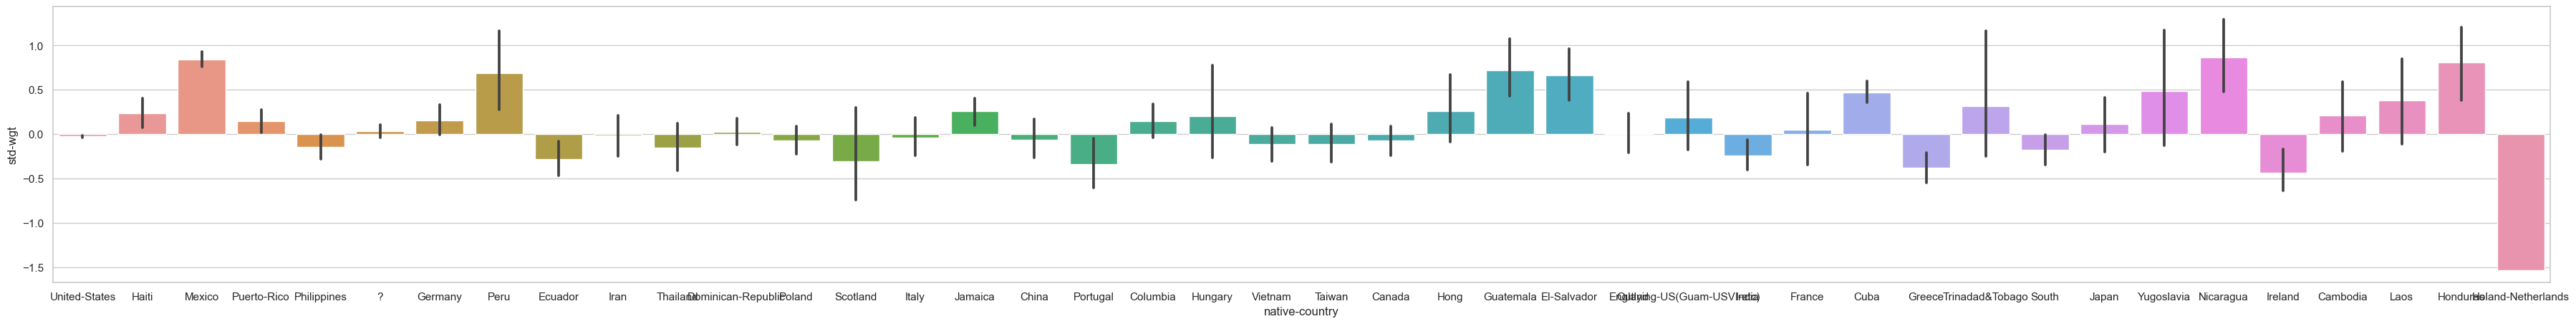

In [101]:
plt.figure(figsize=(45,5))
seaborn.barplot(data=train, x='native-country', y='std-wgt')
# 차트에 더블크리꾸 하면 확대댐
## 히스패닉이랑 연관 잇는거 맞네

In [102]:
### standard scaler 처리 된 컬럼을 비닝하자
train_fnlwgt = scaler.fit_transform(X_train[['fnlwgt']])
test_fnlwgt = scaler.fit_transform(X_test[['fnlwgt']])
X_train['std-wgt'] = train_fnlwgt
X_test['std-wgt'] = test_fnlwgt

### 0이하와 1이상으로 나눠보자...
bins = [-2.0, 0.0, 15]
labels = ['Low-wgt', 'High-wgt']
X_train['binned-wgt'] = pd.cut(x=X_train['std-wgt'], bins=bins, labels=labels)
X_test['binned-wgt'] = pd.cut(x=X_test['std-wgt'], bins=bins, labels=labels)

#이제 fnlwgt는 안녕
# std-wgt는 일단 남겨둔다
X_train.drop('fnlwgt', axis=1, inplace=True)
X_test.drop('fnlwgt', axis=1, inplace=True)

In [103]:
X_train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,std-wgt,binned-wgt
0,25,#2ndCat,7,Mari-Cat2,Job-Cat2,Self-sufficient,Class1,Male,0,0,40,United-States,0,High-wgt
1,39,#2ndCat,10,Mari-Cat2,Job-Cat3,Self-sufficient,Class1,Female,0,1721,55,United-States,-1,Low-wgt
2,35,#2ndCat,13,Mari-Cat3,Job-Cat3,Self-sufficient,Class1,Female,0,0,50,Overseas,0,High-wgt
3,64,#2ndCat,11,Mari-Cat2,Job-Cat1,Self-sufficient,Class1,Female,0,0,40,United-States,-1,Low-wgt
4,24,#2ndCat,10,Mari-Cat1,Job-Cat2,Supporting,Class1,Male,0,0,70,United-States,-1,Low-wgt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,#2ndCat,9,Mari-Cat3,Job-Cat1,Non-supporting,Class2,Male,0,0,40,Hispanic,-1,Low-wgt
29301,21,#2ndCat,9,Mari-Cat3,Job-Cat1,Non-supporting,Class2,Male,0,0,40,United-States,2,High-wgt
29302,18,#2ndCat,6,Mari-Cat3,Job-Cat3,Non-supporting,Class1,Male,0,0,40,United-States,1,High-wgt
29303,33,#2ndCat,7,Mari-Cat3,Job-Cat2,Self-sufficient,Class1,Male,0,0,65,United-States,-0,Low-wgt


## 'capital-loss, capital-gain' Binning

In [104]:
train[['income','capital-gain', 'capital-loss']][train['capital-gain']>0].describe()
# loss면 gain이 없고 gain이 있으면 loss 가 없음!

,income,capital-gain,capital-loss
count,2422,2422,2422
mean,1,13122,0
std,0,22848,0
min,0,114,0
25%,0,3411,0
50%,1,7074,0
75%,1,13550,0
max,1,99999,0


In [105]:
train[['income','capital-gain', 'capital-loss']][(train['capital-gain']>train['capital-loss']) & (train['income']==1)].value_counts()
# continuous ... 지출이 낮았을수록 소득 높음 - categorize 하지 말고 피쳐엔지니어링 ㅎㅏ자

income  capital-gain  capital-loss
1       15024         0               300
        7688          0               240
        7298          0               204
        99999         0               148
        3103          0                88
        5178          0                86
        4386          0                56
        8614          0                50
        27828         0                39
        10520         0                35
        13550         0                31
        20051         0                30
        14084         0                27
        4787          0                22
        14344         0                19
        9386          0                16
        6418          0                13
        10605         0                11
        7430          0                10
        25236         0                10
        4934          0                 8
        15831         0                 7
        6514          0                 6

In [106]:
# feature engineering 방법 : loss 컬럼은 음수로 만들어서 한 컬럼으로 합칠거임
# gain이 0이면 loss가 0이 아니고, continuous한 컬럼이므로 가능함
temp_arr = []
for i in range(X_train['capital-gain'].shape[0]):
    if X_train['capital-gain'][i] > X_train['capital-loss'][i]:
        temp_arr.append(X_train['capital-gain'][i])
    elif X_train['capital-gain'][i] < X_train['capital-loss'][i]:
        temp_arr.append(X_train['capital-loss'][i]*-1)
    else:
        temp_arr.append(0)
X_train['cpt-gain-loss'] = temp_arr

temp_arr = []
for i in range(X_test['capital-gain'].shape[0]):
    if X_test['capital-gain'][i] > X_test['capital-loss'][i]:
        temp_arr.append(X_test['capital-gain'][i])
    elif X_test['capital-gain'][i] < X_test['capital-loss'][i]:
        temp_arr.append(X_test['capital-loss'][i]*-1)
    else:
        temp_arr.append(0)
X_test['cpt-gain-loss'] = temp_arr

In [107]:
X_train.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)
X_test.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [108]:
X_train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,std-wgt,binned-wgt,cpt-gain-loss
0,25,#2ndCat,7,Mari-Cat2,Job-Cat2,Self-sufficient,Class1,Male,40,United-States,0,High-wgt,0
1,39,#2ndCat,10,Mari-Cat2,Job-Cat3,Self-sufficient,Class1,Female,55,United-States,-1,Low-wgt,-1721
2,35,#2ndCat,13,Mari-Cat3,Job-Cat3,Self-sufficient,Class1,Female,50,Overseas,0,High-wgt,0
3,64,#2ndCat,11,Mari-Cat2,Job-Cat1,Self-sufficient,Class1,Female,40,United-States,-1,Low-wgt,0
4,24,#2ndCat,10,Mari-Cat1,Job-Cat2,Supporting,Class1,Male,70,United-States,-1,Low-wgt,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,#2ndCat,9,Mari-Cat3,Job-Cat1,Non-supporting,Class2,Male,40,Hispanic,-1,Low-wgt,0
29301,21,#2ndCat,9,Mari-Cat3,Job-Cat1,Non-supporting,Class2,Male,40,United-States,2,High-wgt,0
29302,18,#2ndCat,6,Mari-Cat3,Job-Cat3,Non-supporting,Class1,Male,40,United-States,1,High-wgt,0
29303,33,#2ndCat,7,Mari-Cat3,Job-Cat2,Self-sufficient,Class1,Male,65,United-States,-0,Low-wgt,0


<hr style="background-color:salmon; height:2px;">
<hr style="background-color:orange; height:2px">

- 피쳐엔지니어링 꾂

- 엔코딩 시작

<hr style="background-color:skyblue; height:2px;">
<hr style="background-color:pink; height:2px;">

# 엔코딩
    - One-Hot

In [109]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [110]:
X_train

,age,education-num,hours-per-week,std-wgt,cpt-gain-loss,workclass_#1stCat,workclass_#2ndCat,workclass_#3rdCat,marital-status_Mari-Cat1,marital-status_Mari-Cat2,...,relationship_Supporting,race_Class1,race_Class2,sex_Female,sex_Male,native-country_Hispanic,native-country_Overseas,native-country_United-States,binned-wgt_Low-wgt,binned-wgt_High-wgt
0,25,7,40,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
1,39,10,55,-1,-1721,0,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
2,35,13,50,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,64,11,40,-1,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
4,24,10,70,-1,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,9,40,-1,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,1,0
29301,21,9,40,2,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
29302,18,6,40,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
29303,33,7,65,-0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [111]:
# capital gain loss 엔지니어링된 컬럼 스케일링중 :: 미백 될거임ㅇㅇ
gain_loss_scaled=scaler.fit_transform(X_train[['cpt-gain-loss']])

In [112]:
X_train['cpt-gain-loss'] = gain_loss_scaled

In [113]:
gain_loss_scaled=scaler.fit_transform(X_test[['cpt-gain-loss']])
X_test['cpt-gain-loss'] = gain_loss_scaled

In [114]:
X_test

,age,education-num,hours-per-week,std-wgt,cpt-gain-loss,workclass_#1stCat,workclass_#2ndCat,workclass_#3rdCat,marital-status_Mari-Cat1,marital-status_Mari-Cat2,...,relationship_Supporting,race_Class1,race_Class2,sex_Female,sex_Male,native-country_Hispanic,native-country_Overseas,native-country_United-States,binned-wgt_Low-wgt,binned-wgt_High-wgt
0,18,10,16,1,-0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
1,29,9,40,-1,-0,0,1,0,1,0,...,1,1,0,1,0,0,0,1,1,0
2,45,13,40,-1,-0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0
3,42,13,40,-1,-0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,1,0
4,41,16,40,0,-0,0,1,0,1,0,...,1,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,45,9,60,-1,-0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,1,0
19533,48,9,50,-0,-0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
19534,63,10,40,-1,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,1,0
19535,18,7,20,-0,-0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0


# 수정 하는곳

In [115]:
X_train.corrwith(train['income'])
# wgt컬럼은 없애는게 좋을거같다 ...

age                             0
education-num                   0
hours-per-week                  0
std-wgt                        -0
cpt-gain-loss                   0
workclass_#1stCat               0
workclass_#2ndCat              -0
workclass_#3rdCat              -0
marital-status_Mari-Cat1        0
marital-status_Mari-Cat2       -0
marital-status_Mari-Cat3       -0
occupation_Job-Cat1             0
occupation_Job-Cat2            -0
occupation_Job-Cat3            -0
relationship_Non-supporting    -0
relationship_Self-sufficient   -0
relationship_Supporting         0
race_Class1                     0
race_Class2                    -0
sex_Female                     -0
sex_Male                        0
native-country_Hispanic        -0
native-country_Overseas         0
native-country_United-States    0
binned-wgt_Low-wgt              0
binned-wgt_High-wgt            -0
dtype: float64

In [116]:
#1. 컬럼 뺴구 해보자
#2. std-wgt를 빼고 아래를 넣어보자
#3. wgt 연관 완전 삭제 (처음 하려고 했던거)
X_train.drop('std-wgt', axis=1, inplace=True)
X_test.drop('std-wgt', axis=1, inplace=True)
#X_train.drop(['binned-wgt_Low-wgt', 'binned-wgt_High-wgt'], axis=1, inplace=True)
#X_test.drop(['binned-wgt_Low-wgt', 'binned-wgt_High-wgt'], axis=1, inplace=True)

# Scaling down
    - 원핫, 레이블 엔코딩 빼고 스케일

In [117]:
scaler = StandardScaler()
scaler.fit(X_train[['age','education-num','hours-per-week','cpt-gain-loss']])
X_train_num_only = scaler.transform(X_train[['age','education-num','hours-per-week','cpt-gain-loss']])
X_test_num_only = scaler.transform(X_test[['age','education-num','hours-per-week','cpt-gain-loss']])

In [118]:
X_train[['age','education-num','hours-per-week','cpt-gain-loss']] = X_train_num_only

In [119]:
X_test[['age','education-num','hours-per-week','cpt-gain-loss']] = X_test_num_only

In [120]:
X_train

,age,education-num,hours-per-week,cpt-gain-loss,workclass_#1stCat,workclass_#2ndCat,workclass_#3rdCat,marital-status_Mari-Cat1,marital-status_Mari-Cat2,marital-status_Mari-Cat3,...,relationship_Supporting,race_Class1,race_Class2,sex_Female,sex_Male,native-country_Hispanic,native-country_Overseas,native-country_United-States,binned-wgt_Low-wgt,binned-wgt_High-wgt
0,-1,-1,-0,-0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
1,0,-0,1,-0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
2,-0,1,1,-0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,2,0,-0,-0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
4,-1,-0,2,-0,0,1,0,1,0,0,...,1,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1,-0,-0,-0,0,1,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
29301,-1,-0,-0,-0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
29302,-2,-2,-0,-0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
29303,-0,-1,2,-0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0


# 모델 선택 & 교차검증
    - for the catwalk
    - Voting? Stack? What?
    - 빠른 실행 위해서 생성자 파라미터 내부 지웠음

In [121]:
#============================RF============================
from sklearn.ensemble import RandomForestClassifier

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
rand_tree = RandomForestClassifier()

In [124]:
rand_tree.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
cross_val_score(rand_tree, X_train, y_train, cv=6, n_jobs=-1).mean()

0.8382870448377101

In [126]:
#============================XGBoost============================
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [127]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [128]:
cross_val_score(xgb, X_train, y_train, cv=6, n_jobs=-1).mean()

0.8667803795234704

In [129]:
#============================GradBoost============================
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

In [130]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [131]:
cross_val_score(gbm, X_train, y_train, cv=6, n_jobs=-1).mean()

0.8647671003095773

In [132]:
#============================Ada============================
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [133]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [134]:
cross_val_score(ada, X_train, y_train, cv=6, n_jobs=-1).mean()

0.8586247268949417

In [135]:
#============================LGBM============================
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [136]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [137]:
cross_val_score(lgbm, X_train, y_train, cv=6, n_jobs=-1).mean()

0.8685207772208795

# 하잎보이 튜닝 & 극기훈련 & 평가
    - GridSearchCV

In [138]:
from sklearn.model_selection import GridSearchCV, KFold

## GBM 튜닝

In [139]:
# GBM GSCV용 파라미터 : 서치, 조절 서치, 조절
gbm_param = {
    'loss':['exponential'],
    'learning_rate':[0.08],#, 0.05, 0.1],
    'n_estimators':[500],
    'min_samples_split':[2],#, 6],
    'min_samples_leaf':[1],#, 3],
    'max_depth':[3],#, 7],
    'random_state':[5],#, 33],
}

In [140]:
# GSCV 컨스트럭터
grid = GridSearchCV(gbm,
                   gbm_param,
                   n_jobs=-1,
                   refit=True,
                   cv=KFold(n_splits=5, shuffle=True, random_state=5),
                   verbose=1)

In [141]:
# 피팅룸
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.08], 'loss': ['exponential'],
                         'max_depth': [3], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [500],
                         'random_state': [5]},
             verbose=1)

In [142]:
# 타이완 남바완
grid.best_score_

0.8675311380310526

In [143]:
# 호옹
grid.best_params_

{'learning_rate': 0.08,
 'loss': 'exponential',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 5}

In [144]:
# 에이다 앙상블을 위해서 모델에 집어넣고
gbm=grid.best_estimator_
display(cross_val_score(gbm, X_train, y_train, cv=5))

array([0.86435762, 0.87681283, 0.86469886, 0.8703293 , 0.86811124])

## XGB

In [145]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_param = {
    'n_estimators':[500],
    'max_depth':[3],
    'max_leaves':[0],
    'n_jobs':[-1],
    'verbosity':[1],
    'booster':['gbtree'],
    'subsample':[0.5],
    'max_delta_step':[0.1,0.2],
    'random_state':[5]
}
grid = GridSearchCV(xgb,
                   xgb_param,
                   n_jobs=-1,
                   cv=KFold(n_splits=5, shuffle=True, random_state=5),
                   verbose=1)

grid.fit(X_train, y_train)
display(f'best score:{grid.best_score_}, best param:{grid.best_params_}')
xgb = grid.best_estimator_
display(cross_val_score(xgb
                        , X_train
                        , y_train
                        , cv=KFold(n_splits=5
                                   , shuffle=True, random_state=7)).mean())
display(xgb.score(X_train, y_train))


Fitting 5 folds for each of 2 candidates, totalling 10 fits


"best score:0.8662685548541205, best param:{'booster': 'gbtree', 'max_delta_step': 0.2, 'max_depth': 3, 'max_leaves': 0, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 5, 'subsample': 0.5, 'verbosity': 1}"

0.8650400955468351

0.8779389182733321

## LGBM 튜닝
    - 파라미터 하나씩 추가해가면서 fine tuning 함

In [146]:
lgbm = LGBMClassifier()
# 르그브므 파라미터 (gridsearch fit < > best_param_으로 반복하면서 조절함)
lgbm_param = {
    'boosting_type':['gbdt'],
    'num_leaves':[15],
    'max_depth':[5],
    'learning_rate':[0.03],
    'n_estimators':[500],
    'class_weight':[None],
    'min_child_samples':[20],
    'colsample_bytree':[0.6],
    'random_state':[5],
    'n_jobs':[-1],
    'subsample_for_bin':[200000],
    'subsample':[0.3],
    'subsample_freq':[0],
    'importance_type':['split']
}
# ㅇㅇ
grid = GridSearchCV(lgbm,
                   param_grid=lgbm_param,
                   cv=KFold(n_splits=3, shuffle=True, random_state=14),
                   n_jobs=-1,
                   verbose=1
                   )
grid.fit(X_train, y_train)
display(grid.best_score_)
display(grid.best_params_)
#담자
lgbm = grid.best_estimator_
print(f'Cross val mean : {cross_val_score(lgbm, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=7)).mean()}')
display(lgbm.score(X_train, y_train))
# wow that's high? ... right?

Fitting 3 folds for each of 1 candidates, totalling 3 fits


0.8704999178819427

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.6,
 'importance_type': 'split',
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_samples': 20,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 15,
 'random_state': 5,
 'subsample': 0.3,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Cross val mean : 0.8689643405562191


0.8739123016550077

## RF 튀잉

In [147]:
# ㄹㄷㅍㄽㅌ ㅍ ㄹ ㅁ ㅌ : 역시 노가다 함
rf = RandomForestClassifier()
rf_param = {
    'n_estimators':[500],
    'criterion':['entropy'],
    'max_depth':[5],
    'min_samples_split':[2],
    'min_samples_leaf':[2],
    'min_weight_fraction_leaf':[0.0],
    'max_features':['sqrt'],
    'max_leaf_nodes':[None],
    'min_impurity_decrease':[0.0],
    'bootstrap':[True],
    'n_jobs':[-1],
    'random_state':[3],
    'verbose':[1],
    'warm_start':[True],
    'class_weight':["balanced_subsample"],
    'ccp_alpha':[0.0],
    'max_samples':[0.03]
}
grid = GridSearchCV(rf,
                   param_grid=rf_param,
                   cv=KFold(n_splits=6, shuffle=True),
                   n_jobs=-1,
                   verbose=1
                   )
grid.fit(X_train, y_train)
print(f'best score: {grid.best_score_}, best params : {grid.best_params_}')
rf = grid.best_estimator_
display(cross_val_score(rf, X_train, y_train, cv=KFold(n_splits=5, shuffle=True), verbose=1, n_jobs=-1))
print(rf.score(X_train, y_train))
## 그러쿠만요
## 버보스 조타 

Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


best score: 0.7734855191098794, best params : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': 0.03, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 3, 'verbose': 1, 'warm_start': True}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


array([0.76164477, 0.77904794, 0.77751237, 0.77853609, 0.7804129 ])

0.7725985326736052


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


## KNN 튜민ㅇ

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
# 코리안 노 노 클래시파이어 ㅇㅇ
knn = KNeighborsClassifier()
knn_param = {
    'n_neighbors':[7],
    'weights':['uniform'],
    'leaf_size':[10],
    'p':[1],
    'n_jobs':[-1],
}
grid = GridSearchCV(knn,
                   param_grid=knn_param,
                   cv=KFold(n_splits=6, shuffle=True),
                   n_jobs=-1,
                   verbose=1
                   )
grid.fit(X_train, y_train)
print(f'best score: {grid.best_score_}, best params : {grid.best_params_}')
knn = grid.best_estimator_
display(cross_val_score(knn, X_train, y_train, cv=KFold(n_splits=5, shuffle=True), verbose=1, n_jobs=-1))
print(knn.score(X_train, y_train))
## KNN 무시 ㄴㄴ ㅋㅋ ㅠㅠ

Fitting 6 folds for each of 1 candidates, totalling 6 fits
best score: 0.8317013743062872, best params : {'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished


array([0.83381675, 0.83091623, 0.82528579, 0.83791162, 0.83620543])

0.8687254734686913


## ADA 튠ㅁ잉

In [150]:
### 이거 오래걸림 각오하슈
ada = AdaBoostClassifier()
ada_param = {
    'base_estimator':[xgb, lgbm],
    'n_estimators':[80],
    'learning_rate':[0.2],
    'random_state':[None]
}
grid = GridSearchCV(ada,
                   param_grid=ada_param,
                   cv=KFold(n_splits=3, shuffle=True),
                   n_jobs=-1,
                   verbose=1
                   )
grid.fit(X_train, y_train)
print(f'best score: {grid.best_score_}, best params : {grid.best_params_}')
ada = grid.best_estimator_
display(cross_val_score(ada, X_train, y_train, cv=KFold(n_splits=5, shuffle=True), verbose=1, n_jobs=-1).mean())
print(ada.score(X_train, y_train))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
best score: 0.8655176489269026, best params : {'base_estimator': LGBMClassifier(colsample_bytree=0.6, learning_rate=0.03, max_depth=5,
               n_estimators=500, num_leaves=15, random_state=5, subsample=0.3), 'learning_rate': 0.2, 'n_estimators': 80, 'random_state': None}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


0.8654837058522435

0.8801228459307285


## VC 튜닝

In [151]:
from sklearn.ensemble import VotingClassifier

In [152]:
### 이거도 오래걸림 각오하슈
voter = VotingClassifier(n_jobs=-1, estimators=[('gbm',gbm),('lgbm',lgbm), ('xgb', xgb)])

voter.fit(X_train, y_train)

display(cross_val_score(voter, X_train, y_train, cv=KFold(n_splits=5, shuffle=True), verbose=1, n_jobs=-1))

print(voter.score(X_train, y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.1s finished


array([0.86435762, 0.86879372, 0.86077461, 0.87425354, 0.87237673])

0.8753796280498208


## Stack 투닝

In [153]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=0.8,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=1000,
    multi_class='auto',
    verbose=1,
    warm_start=False,
    n_jobs=-1,
)
stack = StackingClassifier(estimators=[('xgb',xgb), ('lgbm',lgbm), ('voter', voter)],
                          final_estimator=logi,
                          cv=3,
                          n_jobs=-1)
stack.fit(X_train, y_train)
stack.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.8714895069100836

# 루프!! ->> 6번으로 다시 ㄱ
    - fnlwgt 관련 피쳐를 없애고 하는 방법
    - continuos를 다시 분류화 시키는 방법

# 서브미션

## Ada submission

In [154]:
# 이것도오래걸려
y_test = ada.predict(X_test)

In [155]:
submission = pd.read_csv('./sample_submission.csv')

In [156]:
submission['income'] = y_test

In [157]:
submission.to_csv('submission_Dee01.csv', index=False)

## VC submission

In [158]:
y_test = voter.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['income'] = y_test
submission.to_csv('submission_Dee_Voter.csv', index=False)

## LGBM submission

In [159]:
y_test = lgbm.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['income'] = y_test
submission.to_csv('submission_Dee_LGBM.csv', index=False)

## GBM submission

In [160]:
y_test = gbm.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['income'] = y_test
submission.to_csv('submission_Dee_GBM.csv', index=False)

## RF submission

In [161]:
y_test = rf.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['income'] = y_test
submission.to_csv('submission_Dee05.csv', index=False)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


## KNN submission

In [162]:
y_test = knn.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['income'] = y_test
submission.to_csv('submission_Dee_KNN.csv', index=False)

## Stack submission

In [165]:
y_test = stack.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['income'] = y_test
submission.to_csv('submission_Dee_Stack.csv', index=False)

## XGB submission

In [164]:
y_test = xgb.predict(X_test)
submission = pd.read_csv('./sample_submission.csv')
submission['income'] = y_test
submission.to_csv('submission_Dee_XGB.csv', index=False)

<hr style="background-color:salmon; height:2px;">
<hr style="background-color:orange; height:2px">
<hr style="background-color:lightyellow; height:2px;">
<hr style="background-color:lightgreen; height:2px;">
<hr style="background-color:skyblue; height:2px;">
<hr style="background-color:pink; height:2px;">

- 마무리

<hr style="background-color:salmon; height:2px;">
<hr style="background-color:orange; height:2px">
<hr style="background-color:lightyellow; height:2px;">
<hr style="background-color:lightgreen; height:2px;">
<hr style="background-color:skyblue; height:2px;">
<hr style="background-color:pink; height:2px;">